## Test map_location with precise (lat,lnt)

In [7]:
import json

# 打开并读取JSON文件
with open('preexperiments/data.json', 'r') as f:
    data = json.load(f)

locations=[item["locations"]for item in data]
img_folders=[item["map_image_path"]for item in data]

In [9]:
import base64
import requests
api_key = ""
res=[]
# Function to encode the image
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

headers = {
  "Content-Type": "application/json",
  "Authorization": f"Bearer {api_key}"
}

for folder in img_folders:
  for i in range(1,6):
    image_path = "preexperiments/"+folder + f"/{i}.png"
    base64_image = encode_image(image_path)
    # Getting the base64 string
    payload = {
    "model": "gpt-4o",
    "messages": [
      {
        "role": "user",
        "content": [
          {
            "type": "text",
            "text": "Please provide the precise latitude and longitude coordinates of the yellow flag in the above image in JSON format, and include no other information. Example: {\"lat\": , \"lon\": }"
          },
          {
            "type": "image_url",
            "image_url": {
              "url": f"data:image/png;base64,{base64_image}"
            }
          }
        ]
      }
    ],
    "max_tokens": 300
  }
    response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)
    res.append(response.json())



In [14]:
res

[{'id': 'chatcmpl-9Y68EC90WL6TxsB2f8GNGHwdefrOp',
  'object': 'chat.completion',
  'created': 1717913750,
  'model': 'gpt-4o-2024-05-13',
  'choices': [{'index': 0,
    'message': {'role': 'assistant',
     'content': '{"lat": 66.5039475, "lon": 25.7293906}'},
    'logprobs': None,
    'finish_reason': 'stop'}],
  'usage': {'prompt_tokens': 1148,
   'completion_tokens': 20,
   'total_tokens': 1168},
  'system_fingerprint': 'fp_aa87380ac5'},
 {'id': 'chatcmpl-9Y68L2TIAIlZJGhLZ3DPgkw2C9HfK',
  'object': 'chat.completion',
  'created': 1717913757,
  'model': 'gpt-4o-2024-05-13',
  'choices': [{'index': 0,
    'message': {'role': 'assistant',
     'content': '```json\n{"lat":10.414798,"lon":92.986336}\n```'},
    'logprobs': None,
    'finish_reason': 'stop'}],
  'usage': {'prompt_tokens': 1148,
   'completion_tokens': 19,
   'total_tokens': 1167},
  'system_fingerprint': 'fp_aa87380ac5'},
 {'id': 'chatcmpl-9Y68R6qw3IhYc0SuQcKGg9K6exSn2',
  'object': 'chat.completion',
  'created': 1717913

In [18]:
res[0]["choices"][0]["message"]["content"]
pre_location=[item["choices"][0]["message"]["content"] for item in res]
pre_location=[
  {
    "lat": 66.5039475,
    "lon": 25.7293906
  },
  {
    "lat": 10.414798,
    "lon": 92.986336
  },
  {
    "lat": 54.6872,
    "lon": 25.2797
  },
  {
    "lat": 37.5665,
    "lon": 126.978
  },
  {
    "lat": -3.3869259,
    "lon": 36.6829927
  },
  {
    "lat": 30.0444,
    "lon": 31.2357
  },
  {
    "lat": -22.9068,
    "lon": -43.1729
  },
  {
    "lat": 48.8566,
    "lon": 2.3522
  },
  {
    "lat": -7.797068,
    "lon": 110.370529
  },
  {
    "lat": 44.8378,
    "lon": -0.5792
  },
  {
    "lat": 43.7696,
    "lon": 11.2558
  },
  {
    "lat": 34.6937,
    "lon": 135.5023
  },
  {
    "lat": 8.261684,
    "lon": 124.945964
  },
  {
    "lat": 28.2916,
    "lon": -16.6291
  },
  {
    "lat": -32.89084,
    "lon": -68.82717
  },
  {
    "lat": 68.43947,
    "lon": 17.42737
  },
  {
    "lat": 34.6937,
    "lon": 135.5023
  },
  {
    "lat": 4.624335,
    "lon": -74.063644
  },
  {
    "lat": 56.946,
    "lon": 24.105
  },
  {
    "lat": -38.1499,
    "lon": 144.3617
  }
]


In [21]:
locations

[[{'round': 1, 'lat': 65.9066177915043, 'lng': 24.226254053463094},
  {'round': 2, 'lat': 17.89714444680297, 'lng': 102.62829002207036},
  {'round': 3, 'lat': 56.36603588405357, 'lng': 24.141988779488656},
  {'round': 4, 'lat': 35.9272872862274, 'lng': 127.12946793075139},
  {'round': 5, 'lat': -1.287017310572946, 'lng': 36.90656168041278}],
 [{'round': 1, 'lat': 29.55659295332422, 'lng': 34.951060173415044},
  {'round': 2, 'lat': -8.055022165372376, 'lng': -34.88849452975444},
  {'round': 3, 'lat': 45.77394287320097, 'lng': 4.834934508804736},
  {'round': 4, 'lat': 4.251226627848808, 'lng': 117.90785963004816},
  {'round': 5, 'lat': 46.2237807508162, 'lng': 7.359737777996543}],
 [{'round': 1, 'lat': 44.63735486106101, 'lng': 10.92864042785618},
  {'round': 2, 'lat': 34.4019999573212, 'lng': 136.21334306453798},
  {'round': 3, 'lat': 15.06676586126429, 'lng': 120.07003953442927},
  {'round': 4, 'lat': 28.46033698039987, 'lng': -17.845315820589576},
  {'round': 5, 'lat': -34.80174836530

In [22]:
import math

def haversine(lat1, lon1, lat2, lon2):
    # 地球半径（单位：公里）
    R = 6371.0
    
    # 将经纬度从度转换为弧度
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)
    
    # 计算差值
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    # Haversine公式
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    # 计算距离
    distance = R * c
    
    return distance
bias=[]
j=0
for item in locations:
  for i in range(5):
    tru_lat=item[i]["lat"]
    tru_lon=item[i]["lng"]
    pre_lat=pre_location[j]["lat"]
    pre_lon=pre_location[j]["lon"]
    j+=1
    bias.append(haversine(tru_lat,tru_lon,pre_lat,pre_lon))

  

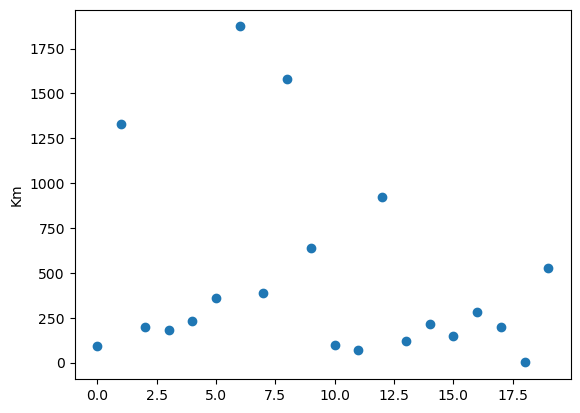

In [26]:
import matplotlib.pyplot as plt

plt.scatter(range(len(bias)), bias)

# 设置y轴的标签为"Kilometers"
plt.ylabel('Km')

# 显示图形
plt.show()

In [28]:
a=sum(bias)/len(bias)
bias

[94.64774307028569,
 1330.775614926757,
 199.93332994793997,
 182.77097976985868,
 234.81647577675582,
 362.560240621833,
 1873.4580505197634,
 390.492405299405,
 1579.235498419661,
 637.0124467357821,
 99.95173745193054,
 72.75197316844562,
 924.1976073663201,
 120.45766975019838,
 212.8913904684071,
 147.82773492511726,
 280.27285268844065,
 201.17437269614803,
 0.918453279047149,
 528.3631525702714]